In [84]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

In [60]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [61]:
x_train.shape

(60000, 28, 28)

In [66]:
if K.image_data_format() == 'channel_first':
    x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1) 

훈련 데이터 x_train 크기 :  (60000, 28, 28, 1)
훈련 데이터 y_train 크기 :  (60000,)
훈련 데이터 x_test 크기 :  (10000, 28, 28, 1)
훈련 데이터 y_test 크기 :  (10000,)
x_train 5개의 이미지


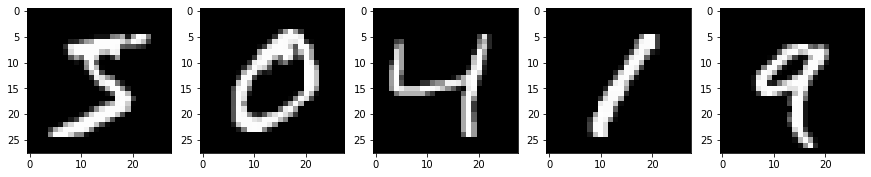

In [67]:
print(f'훈련 데이터 x_train 크기 : ', x_train.shape)
print(f'훈련 데이터 y_train 크기 : ', y_train.shape)
print(f'훈련 데이터 x_test 크기 : ', x_test.shape)
print(f'훈련 데이터 y_test 크기 : ', y_test.shape)
print('x_train 5개의 이미지')

plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
plt.show()

In [68]:
type(x_train)

numpy.ndarray

In [69]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

In [81]:
# y 데이터 원-핫 인코딩

num_classes = 10
y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

In [98]:
np.random.seed(0)

model = Sequential()

# 합성곱층 추가
model.add(Conv2D(2, kernel_size=(3,3), activation='relu', input_shape=input_shape, name='Conv2D_layer'))

# 최대 폴링층 추가
model.add(MaxPooling2D(pool_size=(2,2), name='MaxPooling2D_layer'))

# 플래튼층 추가
model.add(Flatten(name='Flatten_layer'))

# 완전연결계층 추가
model.add(Dense(128, activation='relu', name='Dense1_layer'))
model.add(Dense(num_classes, activation='softmax', name='Dense2_layer'))

# 학습 방법 추가
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.adadelta_v2.Adadelta(), metrics=['accracy'])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv2D_layer (Conv2D)       (None, 26, 26, 2)         20        
                                                                 
 MaxPooling2D_layer (MaxPool  (None, 13, 13, 2)        0         
 ing2D)                                                          
                                                                 
 Flatten_layer (Flatten)     (None, 338)               0         
                                                                 
 Dense1_layer (Dense)        (None, 128)               43392     
                                                                 
 Dense2_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 44,702
Trainable params: 44,702
Non-trainable params: 0
__________________________________________________

In [97]:
dir(keras.optimizers.adadelta_v2.Adadelta())

['Adadelta',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'backend_config',
 'keras_export',
 'np',
 'optimizer_v2',
 'tf']